In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch
import logging

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

/Users/semyonsuvorov/Documents/streamlit_diplom/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, 
    bnb_4bit_compute_dtype=torch.float16, 
    bnb_4bit_use_double_quant=True, 
)

model = AutoModelForCausalLM.from_pretrained(
    "deepseek-ai/DeepSeek-V3-0324",
    quantization_config=quantization_config,
    trust_remote_code=True,
    device_map={"": "cpu"},
    offload_state_dict=False, # Disable offloading
    cache_dir="models-cache"
)
logger.info("Model loaded successfully with quantization.")


PackageNotFoundError: No package metadata was found for bitsandbytes

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-V3-0324", cache_dir="models-cache", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("deepseek-ai/DeepSeek-V3-0324", cache_dir="models-cache", trust_remote_code=True)

Fetching 14 files:   0%|          | 0/14 [03:41<?, ?it/s]


project/
├── data/                   # Предобученные модели и примеры данных
├── utils/
│   ├── preprocessing.py    # Функции очистки данных
│   ├── models.py           # Классы ML-моделей
│   └── visualization.py    # Построение графиков
└── app.py                  # Основной скрипт Streamlit

In [6]:
import pandas as pd
data = pd.read_csv("/Users/semyonsuvorov/Documents/streamlit_diplom/data/sample_data.csv")

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

Matplotlib is building the font cache; this may take a moment.
/Users/semyonsuvorov/Documents/streamlit_diplom/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/semyonsuvorov/Documents/streamlit_diplom/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/semyonsuvorov/Documents/streamlit_diplom/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/semyonsuvorov/Documents/streamlit_diplom/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible st

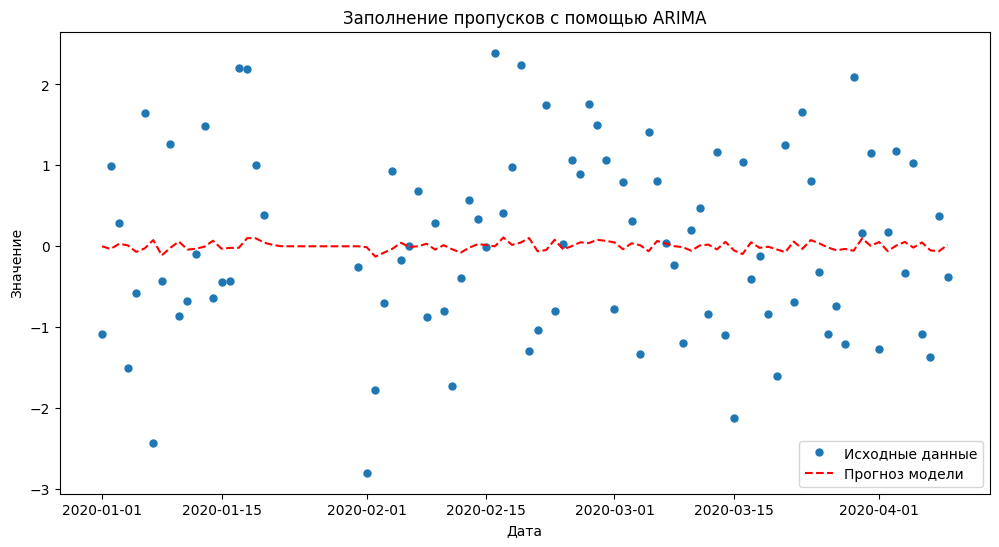

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Создание временного ряда с пропусками
np.random.seed(123)
n = 100
time = pd.date_range(start='2020-01-01', periods=n, freq='D')
data = np.random.normal(0, 1, n)
data[20:30] = np.nan  # Пропуски с индекса 20 по 29

# DataFrame с пропусками
df = pd.DataFrame({'date': time, 'value': data})
df.set_index('date', inplace=True)

# Построение модели SARIMAX (ARIMA(1,0,1))
model = SARIMAX(
    df['value'],
    order=(1, 0, 1),          # (p, d, q)
    seasonal_order=(0, 0, 0, 0),
    initialization='approximate_diffuse'  # Для обработки пропусков
)
results = model.fit(disp=False)

# Получение предсказанных значений (включая пропуски)
fitted_values = results.get_prediction().predicted_mean

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], 'o', label='Исходные данные', markersize=5)
plt.plot(fitted_values.index, fitted_values, 'r--', label='Прогноз модели')
plt.title('Заполнение пропусков с помощью ARIMA')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()